In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
import random

In [2]:

#Import the image and display in a window
img = cv.imread('saphira.jpg')


#Create a kernle with a square matrix of 31x31
#divide the matrix by (31^2) = 961 to average it
kernelmean = np.ones((31,31),np.float32)/ 961

#Apply averaging kernel into image to filter
avgfilter = cv.filter2D(img,-1,kernelmean)

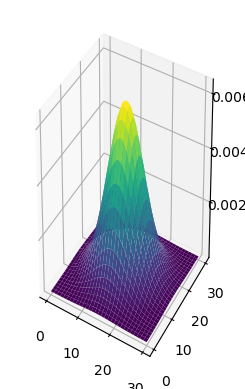

In [3]:


#Get Gaussian filter
gauss = cv.getGaussianKernel(31, 5)
gaus = np.outer(gauss,gauss)

#Surface plot of Gaussian Filter
n = 31
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')
x = np.arange(0, n, 1)
y = np.arange(0, n, 1)
X, Y = np.meshgrid(x, y)
Z = gaus.flatten()
ax.plot_surface(X, Y, gaus, cmap='viridis')
plt.show()

In [4]:

#Apply the Gaussian blur on the image
blur = cv.GaussianBlur(img,(31,31),5)

#Concatenate the images in the same window
window2 = cv.hconcat([img,avgfilter, blur])
cv.imshow('Original + Average Filter + Gaussian Blur Filter', window2)


In [5]:
def add_noise(img):

    # Getting the dimensions of the image 
    row , col, c = img.shape
        
    # Randomly pick some pixels in the 
    # image for coloring them white 
    # Pick a random number between 300 and 10000 
    number_of_pixels = random.randint(300, 10000) 
    for i in range(number_of_pixels): 
            
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
            
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
            
        # Color that pixel to white 
        img[y_coord][x_coord] = 255
            
        # Randomly pick some pixels in 
        # the image for coloring them black 
        # Pick a random number between 300 and 10000 
    number_of_pixels = random.randint(300 , 10000) 
    for i in range(number_of_pixels): 
            
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
            
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
            
        # Color that pixel to black 
        img[y_coord][x_coord] = 0

        
    return img

In [6]:

#Convert the image to Grayscale to be used to add noise
#Save the image to the directory
#gray = cv.imread('saphira.jpg',cv.IMREAD_GRAYSCALE)
cv.imwrite('salt-n-pepper.jpg',add_noise(img)) 
salt_n_peppa = cv.imread('salt-n-pepper.jpg')

In [7]:
 
#Create a kernle with a square matrix of 3x3
#divide the matrix by 3^2 = 9 to average
kernelmean2 = np.ones((3,3),np.float32)/ 9

#Apply averaging kernel into image to filter
avgfilter2 = cv.filter2D(salt_n_peppa,-1,kernelmean2)


#Apply the Gaussian blur on the image
blur2 = cv.GaussianBlur(salt_n_peppa,(3,3),0.5) 


#Add Median Blur
med = cv.medianBlur(salt_n_peppa,3)

#Concatenate the images in the same window
window3 = cv.hconcat([salt_n_peppa,avgfilter2, blur2, med])
cv.imshow('Salt N Pepper Picture + Averaging Filter + Gausiann Filter + Median Blur', window3)


cv.waitKey(0)
cv.destroyAllWindows() 